In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mtick

plt.style.use('seaborn-ticks')
# in each case below, append the name of the dataset.csv
web_path = 'https://www.openintro.org/data/csv' # url path to openintro.org data
loc_path = %pwd # local path if you had downloaded the data
loc_path += '/csv/' 

# Chapter 1

---

## `stent30`, `stent365`

In [8]:
p_30 = pd.read_csv(loc_path+"stent30.csv", header=0, names=['group', '0-30 days'])
p_365 = pd.read_csv(loc_path+"stent365.csv", header=0, names=['group', '0-365 days'])

one_one = p_30.merge(p_365, 
    on='group', 
    left_index=True,
    right_index=True
    ).set_index(np.arange(1, 452))

one_one.index.name = 'patient'
one_one.head()

group 0-30 days 0-365 days
patient                                
1        treatment    stroke     stroke
2        treatment    stroke     stroke
3        treatment    stroke     stroke
4        treatment    stroke     stroke
5        treatment    stroke     stroke

In [3]:
time_points = {
    '0-30':(p_30
            .pivot_table(index='group', 
            columns=['0-30 days'], 
            aggfunc=len)[::-1].T[::-1]),
            
    '0-365':(p_365
            .pivot_table(index='group', 
            columns=['0-365 days'], 
            aggfunc=len)[::-1].T[::-1])
    
} ## [::-1].T[::-1] to sort the table

one_two = pd.concat(
    time_points, 
    names=['days', 'outcome'],
    ).T

one_two

days        0-30           0-365         
outcome   stroke no event stroke no event
group                                    
treatment     33      191     45      179
control       13      214     28      199

---

## `email50`

In [4]:
one_three = pd.read_csv(
    loc_path+"email50.csv", 
    header=0)
one_three.head(3)

spam  to_multiple  from  cc  sent_email                 time  image  \
0     0            0     1   0           1  2012-01-04 05:19:16      0   
1     0            0     1   0           0  2012-02-16 12:10:06      0   
2     1            0     1   4           0  2012-01-04 07:36:23      0   

   attach  dollar winner  ...  viagra  password  num_char  line_breaks  \
0       0       0     no  ...       0         0    21.705          551   
1       0       0     no  ...       0         0     7.011          183   
2       2       0     no  ...       0         0     0.631           28   

   format  re_subj  exclaim_subj  urgent_subj  exclaim_mess  number  
0       1        1             0            0             8   small  
1       1        0             0            0             1     big  
2       0        0             0            0             2    none  

[3 rows x 21 columns]

---
## `county`

*Does not contain `fed_spend` column as is assumed in the book*

In [5]:
one_five = pd.read_csv(
    loc_path+"county.csv", 
    header=0)
one_five.head(3)

name    state   pop2000  pop2010   pop2017  pop_change  poverty  \
0  Autauga County  Alabama   43671.0    54571   55504.0        1.48     13.7   
1  Baldwin County  Alabama  140415.0   182265  212628.0        9.19     11.8   
2  Barbour County  Alabama   29038.0    27457   25270.0       -6.22     27.2   

   homeownership  multi_unit  unemployment_rate metro    median_edu  \
0           77.5         7.2               3.86   yes  some_college   
1           76.7        22.6               3.99   yes  some_college   
2           68.0        11.1               5.90    no    hs_diploma   

   per_capita_income  median_hh_income smoking_ban  
0           27841.70           55317.0        none  
1           27779.85           52562.0        none  
2           17891.73           33368.0     partial

In [445]:
mpl.rcParams.keys()

C:\Users\pluto\Miniconda3\lib\_collections_abc.py:705: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return '{0.__class__.__name__}({0._mapping!r})'.format(self)


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'a

In [452]:
mpl.rcParams['figure.figsize'] = [18, 5]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.titlesize'] = 18

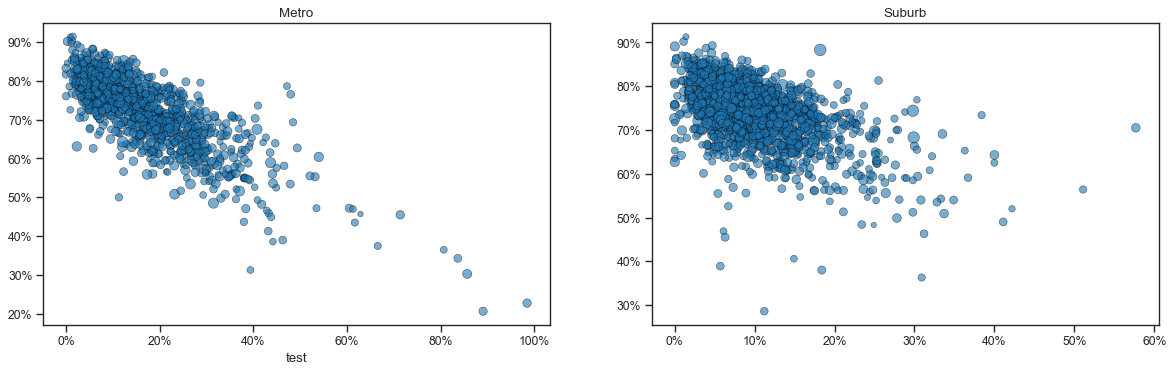

In [453]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 5))

ax1.scatter(data=one_five[one_five.metro == 'yes'],
            y='homeownership',
            x='multi_unit',
            s=one_five.per_capita_income/500,
            alpha=0.6,
            edgecolors='black',
            linewidths=0.5,
           );

ax1.yaxis.set_major_formatter(mtick.PercentFormatter());ax1.xaxis.set_major_formatter(mtick.PercentFormatter());
ax1.set_title('Metro')
ax1.set_xlabel('test')

ax2.scatter(data=one_five[one_five.metro == 'no'],
            y='homeownership',
            x='multi_unit',
            s=one_five.per_capita_income/500,
            alpha=0.6,
            edgecolors='black',
            linewidths=0.5,
           );

ax2.yaxis.set_major_formatter(mtick.PercentFormatter());ax2.xaxis.set_major_formatter(mtick.PercentFormatter());
ax2.set_title('Suburb');

In [354]:
sns.relplot

<function seaborn.relational.relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)>

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

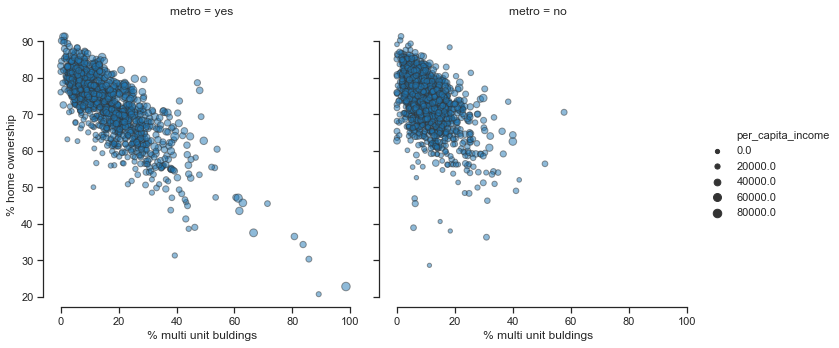

In [437]:
ax3 = sns.relplot(
    data=one_five,
    y="homeownership", 
    x="multi_unit", 
    col="metro",
    size='per_capita_income',
    linewidth=1, 
    alpha=.5, 
    edgecolor=".2", 
    palette="YlGnBu", 
#     hue='median_edu',
    legend='brief'
);

ax3.set_axis_labels('% multi unit buldings', '% home ownership')
sns.set_style("ticks")
sns.despine(trim=True, left=False, bottom=False)

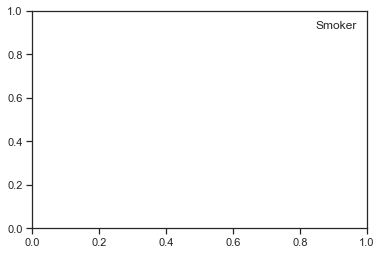

In [367]:
plt.legend(title='education', loc='upper right', labels=list('abcd'))

In [387]:
new_labels = ['label 1', 'label 2']
for t, l in zip(ax._legend.texts, one_five.median_edu.unique().tolist()): t.set_text(l)
ax._legend.texts

[Text(0, 0, 'some_college'),
 Text(0, 0, 'hs_diploma'),
 Text(0, 0, 'nan'),
 Text(0, 0, 'bachelors'),
 Text(0, 0, 'below_hs')]

In [396]:
one_five.dropna().shape

(2560, 15)

In [409]:
one_five.isna?

In [411]:
one_five.isnull().sum()

name                   0
state                  0
pop2000                3
pop2010                0
pop2017                3
pop_change             3
poverty                2
homeownership          0
multi_unit             0
unemployment_rate      3
metro                  3
median_edu             2
per_capita_income      2
median_hh_income       2
smoking_ban          580
dtype: int64